In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets
from sklearn import metrics
from glob import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [78]:

files = glob('adult/adult*.csv')
print(files)


['adult\\adult_data(N)_v1.csv', 'adult\\adult_test(N)_v1.csv']


In [ ]:
df = pd.concat(
    (pd.read_csv(file, usecols=['name','adult'], dtype={ 'name': str, 'adult':str}) for file in files), ignore_index=True,header=None)
 
print(df)


In [33]:
col_names = ['Age','Workclass(Federal-gov)','Workclass(Local-gov)','Workclass(Private)','Workclass(Self-emp-inc)','Workclass(Self-emp-not-inc)'
             ,'Workclass(State-gov)','Workclass(Without-pay)','Fnlwgt','Education','MSRS(Divorced_Not-in-family)','MSRS(Divorced_Other-relative)'
             ,'MSRS(Divorced_Own-child)','MSRS(Divorced_Unmarried)','MSRS(Married-AF-spouse_Husband)','MSRS(Married-AF-spouse_Other-relative)'
             ,'MSRS(Married-AF-spouse_Own-child)','MSRS(Married-AF-spouse_Wife)','MSRS(Married-civ-spouse_Husband)','MSRS(Married-civ-spouse_Not-in-family)'
             ,'MSRS(Married-civ-spouse_Other-relative)','MSRS(Married-civ-spouse_Own-child)','MSRS(Married-civ-spouse_Wife)'
             ,'MSRS(Married-spouse-absent_Not-in-family)','MSRS(Married-spouse-absent_Other-relative)','MSRS(Married-spouse-absent_Own-child)'
             ,'MSRS(Married-spouse-absent_Unmarried)','MSRS(Never-married_Not-in-family)','MSRS(Never-married_Other-relative)'
             ,'MSRS(Never-married_Own-child)','MSRS(Never-married_Unmarried)','MSRS(Separated_Not-in-family)','MSRS(Separated_Other-relative)'
             ,'MSRS(Separated_Own-child),MSRS(Separated_Unmarried)','MSRS(Widowed_Not-in-family)','MSRS(Widowed_Other-relative)','MSRS(Widowed_Own-child)'
             ,'MSRS(Widowed_Unmarried)','Occupation(Adm-clerical)','Occupation(Armed-Forces)','Occupation(Craft-repair)','Occupation(Exec-managerial)','Occupation(Farming-fishing)'
             ,'Occupation(Handlers-cleaners)','Occupation(Machine-op-inspct)','Occupation(Other-service)','Occupation(Priv-house-serv)','Occupation(Prof-specialty)'
             ,'Occupation(Protective-serv)','Occupation(Sales)','Occupation(Tech-support)','Occupation(Transport-moving)','Race(Amer-Indian-Eskimo)','Race(Asian-Pac-Islander)'
             ,'Race(Black)','Race(Other)','Race(White)','Sex','Gain','Loss','Country(Cambodia)','Country(Canada)','Country(China)','Country(Columbia)'
             ,'Country(Cuba)','Country(Dominican-Republic)','Country(Ecuador)','Country(El-Salvador)','Country(England)','Country(France)'
             ,'Country(Germany)','Country(Greece)','Country(Guatemala)','Country(Haiti)','Country(Holand-Netherlands)','Country(Honduras)'
             ,'Country(Hong)','Country(Hungary)','Country(India)','Country(Iran)','Country(Ireland)','Country(Italy)','Country(Jamaica)'
             ,'Country(Japan)','Country(Laos)','Country(Mexico)','Country(Nicaragua)','Country(Outlying-US(Guam-USVI-etc))','Country(Peru),Country(Philippines)'
             ,'Country(Poland)','Country(Portugal)','Country(Puerto-Rico)','Country(Scotland)','Country(South)','Country(Taiwan)'
             ,'Country(Thailand)','Country(Trinadad&amp;Tobago)','Country(United-States)','Country(Vietnam)','Country(Yugoslavia)','Over50K','Y']
# load datasetSex
data = pd.read_csv("adult _test(N)_v1.csv", header=None, names=col_names)

In [34]:
col_names = ['Age','Workclass(Federal-gov)','Workclass(Local-gov)','Workclass(Private)','Workclass(Self-emp-inc)','Workclass(Self-emp-not-inc)'
             ,'Workclass(State-gov)','Workclass(Without-pay)','Fnlwgt','Education','MSRS(Divorced_Not-in-family)','MSRS(Divorced_Other-relative)'
             ,'MSRS(Divorced_Own-child)','MSRS(Divorced_Unmarried)','MSRS(Married-AF-spouse_Husband)','MSRS(Married-AF-spouse_Other-relative)'
             ,'MSRS(Married-AF-spouse_Own-child)','MSRS(Married-AF-spouse_Wife)','MSRS(Married-civ-spouse_Husband)','MSRS(Married-civ-spouse_Not-in-family)'
             ,'MSRS(Married-civ-spouse_Other-relative)','MSRS(Married-civ-spouse_Own-child)','MSRS(Married-civ-spouse_Wife)'
             ,'MSRS(Married-spouse-absent_Not-in-family)','MSRS(Married-spouse-absent_Other-relative)','MSRS(Married-spouse-absent_Own-child)'
             ,'MSRS(Married-spouse-absent_Unmarried)','MSRS(Never-married_Not-in-family)','MSRS(Never-married_Other-relative)'
             ,'MSRS(Never-married_Own-child)','MSRS(Never-married_Unmarried)','MSRS(Separated_Not-in-family)','MSRS(Separated_Other-relative)'
             ,'MSRS(Separated_Own-child),MSRS(Separated_Unmarried)','MSRS(Widowed_Not-in-family)','MSRS(Widowed_Other-relative)','MSRS(Widowed_Own-child)'
             ,'MSRS(Widowed_Unmarried)','Occupation(Adm-clerical)','Occupation(Armed-Forces)','Occupation(Craft-repair)','Occupation(Exec-managerial)','Occupation(Farming-fishing)'
             ,'Occupation(Handlers-cleaners)','Occupation(Machine-op-inspct)','Occupation(Other-service)','Occupation(Priv-house-serv)','Occupation(Prof-specialty)'
             ,'Occupation(Protective-serv)','Occupation(Sales)','Occupation(Tech-support)','Occupation(Transport-moving)','Race(Amer-Indian-Eskimo)','Race(Asian-Pac-Islander)'
             ,'Race(Black)','Race(Other)','Race(White)','Sex','Gain','Loss','Country(Cambodia)','Country(Canada)','Country(China)','Country(Columbia)'
             ,'Country(Cuba)','Country(Dominican-Republic)','Country(Ecuador)','Country(El-Salvador)','Country(England)','Country(France)'
             ,'Country(Germany)','Country(Greece)','Country(Guatemala)','Country(Haiti)','Country(Holand-Netherlands)','Country(Honduras)'
             ,'Country(Hong)','Country(Hungary)','Country(India)','Country(Iran)','Country(Ireland)','Country(Italy)','Country(Jamaica)'
             ,'Country(Japan)','Country(Laos)','Country(Mexico)','Country(Nicaragua)','Country(Outlying-US(Guam-USVI-etc))','Country(Peru),Country(Philippines)'
             ,'Country(Poland)','Country(Portugal)','Country(Puerto-Rico)','Country(Scotland)','Country(South)','Country(Taiwan)'
             ,'Country(Thailand)','Country(Trinadad&amp;Tobago)','Country(United-States)','Country(Vietnam)','Country(Yugoslavia)','Over50K','Y']
# load datasetSex
data = pd.read_csv("adult _data(N)_v1.csv", header=None, names=col_names)

In [35]:
data.head()

,,Age,Workclass(Federal-gov),Workclass(Local-gov),Workclass(Private),Workclass(Self-emp-inc),Workclass(Self-emp-not-inc),Workclass(State-gov),Workclass(Without-pay),Fnlwgt,Education,...,Country(Scotland),Country(South),Country(Taiwan),Country(Thailand),Country(Trinadad&amp;Tobago),Country(United-States),Country(Vietnam),Country(Yugoslavia),Over50K,Y
0.301370,0,0,0,0,0,1,0,0.043338,0.800000,0,0,...,0,0,0,0,0,1,0,0,0,40
0.452055,0,0,0,0,1,0,0,0.047277,0.800000,0,0,...,0,0,0,0,0,1,0,0,0,13
0.287671,0,0,1,0,0,0,0,0.137244,0.533333,1,0,...,0,0,0,0,0,1,0,0,0,40
0.493151,0,0,1,0,0,0,0,0.150212,0.400000,0,0,...,0,0,0,0,0,1,0,0,0,40
0.150685,0,0,1,0,0,0,0,0.220703,0.800000,0,0,...,0,0,0,0,0,0,0,0,0,40


In [36]:
from tkinter import Y
feature_cols = ['Age','Workclass(Federal-gov)','Workclass(Local-gov)','Workclass(Private)','Workclass(Self-emp-inc)','Workclass(Self-emp-not-inc)'
             ,'Workclass(State-gov)','Workclass(Without-pay)','Fnlwgt','Education','MSRS(Divorced_Not-in-family)','MSRS(Divorced_Other-relative)'
             ,'MSRS(Divorced_Own-child)','MSRS(Divorced_Unmarried)','MSRS(Married-AF-spouse_Husband)','MSRS(Married-AF-spouse_Other-relative)'
             ,'MSRS(Married-AF-spouse_Own-child)','MSRS(Married-AF-spouse_Wife)','MSRS(Married-civ-spouse_Husband)','MSRS(Married-civ-spouse_Not-in-family)'
             ,'MSRS(Married-civ-spouse_Other-relative)','MSRS(Married-civ-spouse_Own-child)','MSRS(Married-civ-spouse_Wife)'
             ,'MSRS(Married-spouse-absent_Not-in-family)','MSRS(Married-spouse-absent_Other-relative)','MSRS(Married-spouse-absent_Own-child)'
             ,'MSRS(Married-spouse-absent_Unmarried)','MSRS(Never-married_Not-in-family)','MSRS(Never-married_Other-relative)'
             ,'MSRS(Never-married_Own-child)','MSRS(Never-married_Unmarried)','MSRS(Separated_Not-in-family)','MSRS(Separated_Other-relative)'
             ,'MSRS(Separated_Own-child),MSRS(Separated_Unmarried)','MSRS(Widowed_Not-in-family)','MSRS(Widowed_Other-relative)','MSRS(Widowed_Own-child)'
             ,'MSRS(Widowed_Unmarried)','Occupation(Adm-clerical)','Occupation(Armed-Forces)','Occupation(Craft-repair)','Occupation(Exec-managerial)','Occupation(Farming-fishing)'
             ,'Occupation(Handlers-cleaners)','Occupation(Machine-op-inspct)','Occupation(Other-service)','Occupation(Priv-house-serv)','Occupation(Prof-specialty)'
             ,'Occupation(Protective-serv)','Occupation(Sales)','Occupation(Tech-support)','Occupation(Transport-moving)','Race(Amer-Indian-Eskimo)','Race(Asian-Pac-Islander)'
             ,'Race(Black)','Race(Other)','Race(White)','Sex','Gain','Loss','Country(Cambodia)','Country(Canada)','Country(China)','Country(Columbia)'
             ,'Country(Cuba)','Country(Dominican-Republic)','Country(Ecuador)','Country(El-Salvador)','Country(England)','Country(France)'
             ,'Country(Germany)','Country(Greece)','Country(Guatemala)','Country(Haiti)','Country(Holand-Netherlands)','Country(Honduras)'
             ,'Country(Hong)','Country(Hungary)','Country(India)','Country(Iran)','Country(Ireland)','Country(Italy)','Country(Jamaica)'
             ,'Country(Japan)','Country(Laos)','Country(Mexico)','Country(Nicaragua)','Country(Outlying-US(Guam-USVI-etc))','Country(Peru),Country(Philippines)'
             ,'Country(Poland)','Country(Portugal)','Country(Puerto-Rico)','Country(Scotland)','Country(South)','Country(Taiwan)'
             ,'Country(Thailand)','Country(Trinadad&amp;Tobago)','Country(United-States)','Country(Vietnam)','Country(Yugoslavia)','Over50K']
X = data[feature_cols] # Features
y = data.Y # Target variable
y

0.301370  0    40
0.452055  0    13
0.287671  0    40
0.493151  0    40
0.150685  0    40
               ..
0.136986  0    38
0.315068  0    40
0.561644  0    40
0.068493  0    20
0.479452  0    40
Name: Y, Length: 30162, dtype: int64

In [4]:
data2 = preprocessing.normalize(data, norm= 'l2')
scaler = MinMaxScaler()
data3 = scaler.fit(data)
data3 = scaler.transform(data)

NameError: name 'data' is not defined

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [39]:
X_train.shape

(22621, 101)

In [ ]:
featureName=[]#特徵欄位名稱
for f in range(0,len(X_train[0])):
    featureName.append(X_train[0][f])
    
trainFeature=[]#train特徵
trainClass=[]#train類別
for i in range(1,len(X_train)):
    trainClass.append(X_train[i][len(X_train[i])-1])
    rowData=[]
    for r in range(0,len(X_train[i])-1):
        rowData.append(X_train[i][r])
    trainFeature.append(rowData)
import math
testFeature=[]#test特徵
testClass=[]#test類別
for i in range(1,len(X_test)):
    testClass.append(X_test[i][len(X_test[i])-1])
    rowData=[]
    for r in range(0,len(X_test[i])-1):
        rowData.append(X_test[i][r])
    testFeature.append(rowData)

In [5]:
#training
trainingPath=r'adult _data(N)_v1.csv'
trainingData=[]
import csv
with open(trainingPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     trainingData.append(r)
Xtraining=[]
ytraining=[]
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(trainingData)):
    #Row Data
    rowData=[]
    for c in range(0,len(trainingData[r])):
        rowData.append(trainingData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X_train=[]
y_train=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_train.append(rowData)
    y_train.append(float(pureData[r][len(pureData[r])-1]))
#test
testPath=r'adult _test(N)_v1.csv'
testData=[]
import csv
with open(testPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     testData.append(r)
#Pure Data
pureData=[]
for r in range(0,len(testData)):
    #Row Data
    rowData=[]
    for c in range(0,len(testData[r])):
        rowData.append(testData[r][c])
    if(r!=0):
        pureData.append(rowData)
X_test=[]
y_test=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X_test.append(rowData)
    y_test.append(float(pureData[r][len(pureData[r])-1]))

In [26]:
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("MAE:",mean_absolute_error(y_test,y_pred))
print("RMSE : %.4g" % mean_squared_error(y_test, y_pred,squared=False))
print("MAPE:",mean_absolute_percentage_error(y_test,y_pred))

MAE: 8.597582840826083
RMSE : 12.42
MAPE: 0.304671585630099


In [27]:
print(knn.score(X_train,y_train))
print(knn.score(X_test,y_test))

0.6440758936277602
-0.05961525631256892


In [13]:
# error_rate = []

# for i in range(1,60):
#   knn = KNeighborsClassifier(n_neighbors=i)
#   knn.fit(X_train,y_train)
#   pred_i = knn.predict(X_test)
#   error_rate.append(np.mean(pred_i != y_test))

ValueError: Unknown label type: 'continuous'

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

score_array [0.527180132257317, 0.42373348059558746, 0.3806768628357535, 0.3543149898366931, 0.33769878714562074, 0.3257072248190772, 0.31587853952420586, 0.30808065219637226, 0.30108134423858945]
 
score_array_MAX: 0.527180132257317
----------------------------------------------------------------------------------------------------------
score_array_test [0.03289570712058987, 0.13102791931436863, 0.17374362762370987, 0.18959696678220983, 0.20087958125554461, 0.20911400754951903, 0.21438794123499605, 0.21477691762520834, 0.21607356394022048]
 
score_array_test_MAX: 0.21607356394022048


Text(0, 0.5, 'score_array')

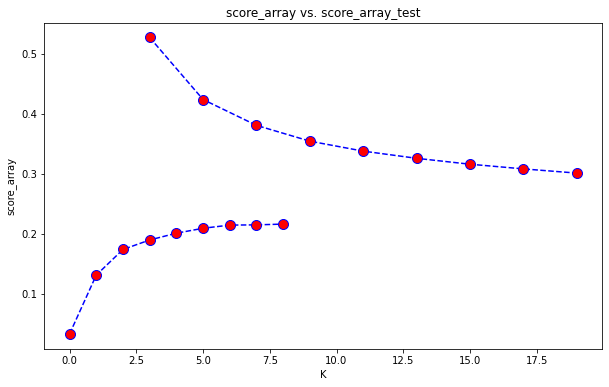

In [28]:
score_array= []
score_array_test= []
xArray=[]
for i in range(3,20):   
    if(i%2==1):
        xArray.append(i)
        y_pred_knn = KNeighborsRegressor(n_neighbors=i)
        y_pred_knn.fit(X_train, y_train)
        score_val = y_pred_knn.score(X_train, y_train)
        score_test = y_pred_knn.score(X_test, y_test)
        score_array.append(score_val)
        score_array_test.append(score_test)

print("score_array",score_array)
print(" ")
print("score_array_MAX:", np.max(score_array))
print("----------------------------------------------------------------------------------------------------------")
print("score_array_test", score_array_test)
print(" ")
print("score_array_test_MAX:", np.max(score_array_test))
plt.figure(figsize=(10,6))
plt.plot(xArray,score_array,score_array_test,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('score_array vs. score_array_test')
plt.xlabel('K')
plt.ylabel('score_array')